In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KernelKMeans

import collections


In [3]:
plt.style.use('fivethirtyeight')

In [4]:
np.random.seed(0)

In [5]:
products_season= pd.read_excel('재별_및_상품군별_판매액계절조정지수_201701_202009.xlsx')

In [6]:
products_season['시점'] = products_season['시점'].astype('str').apply(lambda x: x[:4]+'-'+x[5:8])
products_season['시점']=pd.to_datetime(products_season['시점'])

In [7]:
products_season.drop(columns=['총지수',  '기타내구재','총지수(승용차 제외)', '내구재','준내구재','비내구재','기타준내구재','기타비내구재']
                ,inplace=True)

In [8]:
types=list(products_season.columns)[1:]

Text(0.5, 1.0, '추이')

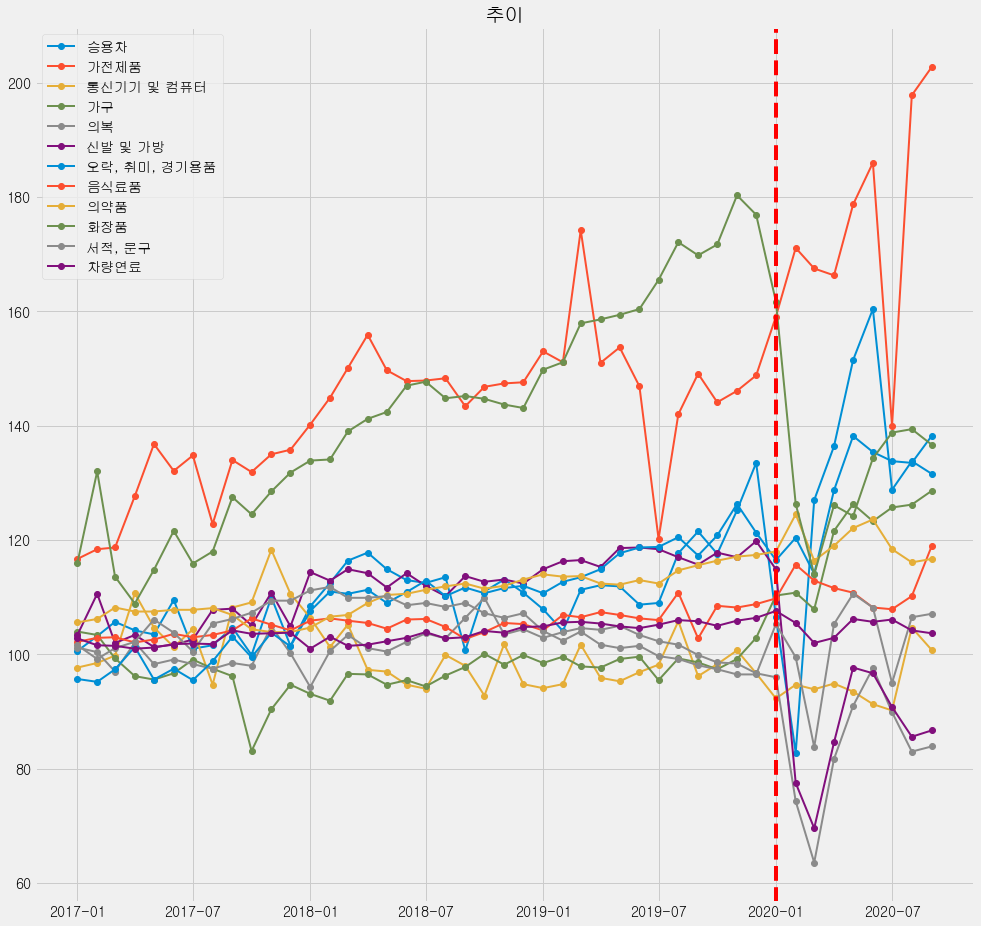

In [9]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
for i in types:
    ax.plot(np.array(products_season[['시점']]),np.array(products_season[[i]]),marker='o', linewidth=2,label=products_season[[i]].columns[0])
ax.axvline(x=products_season['시점'][36],linestyle ='--',color='r') 
ax.legend(loc='upper left')
ax.set_title('추이')

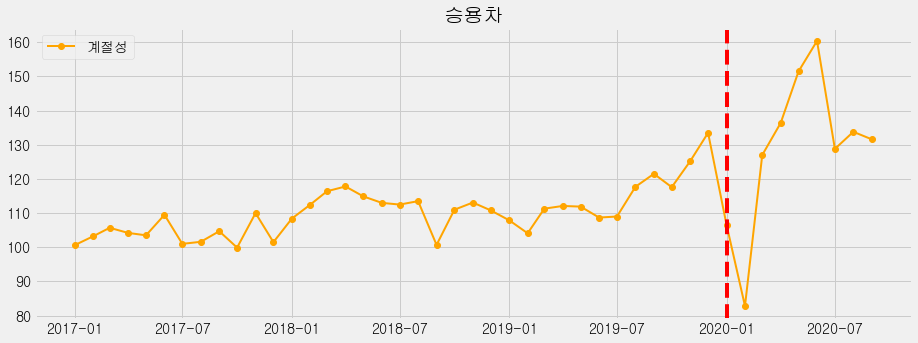

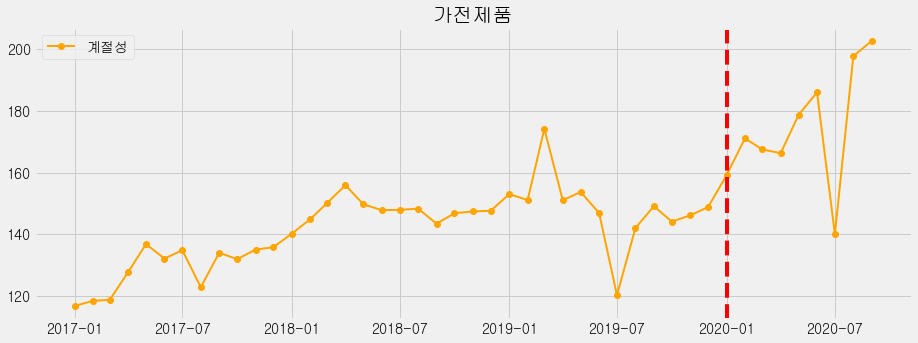

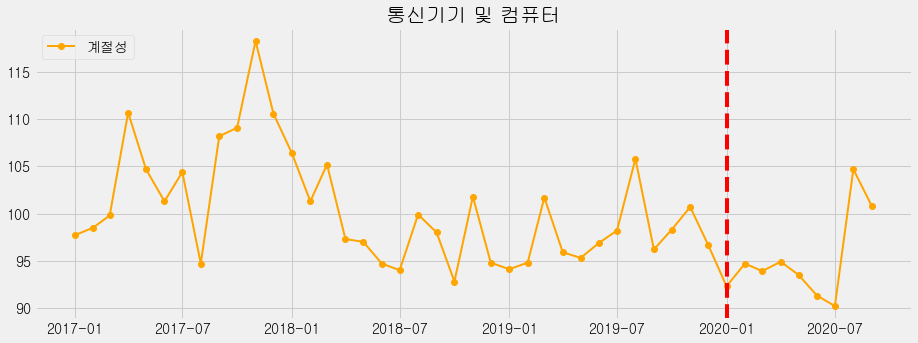

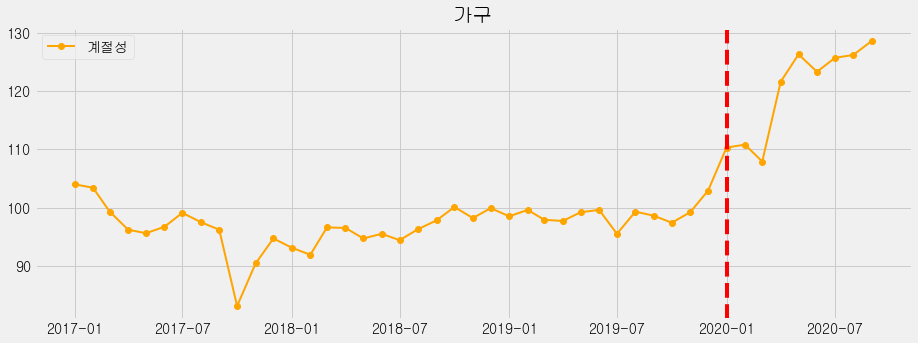

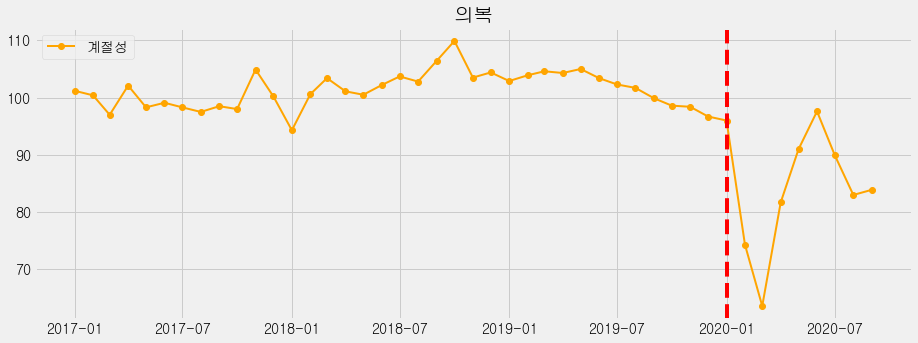

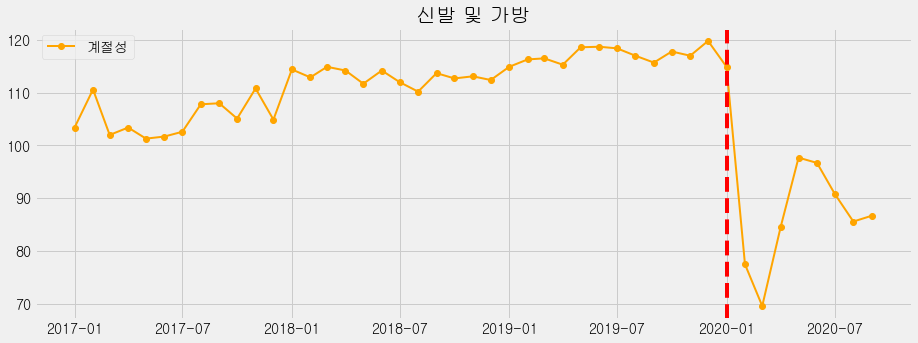

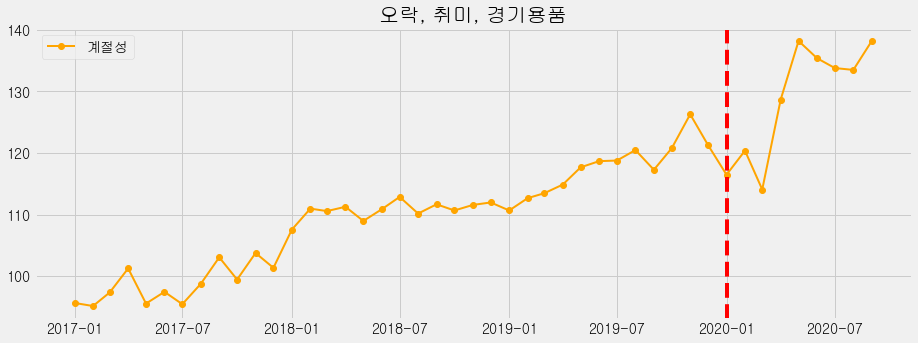

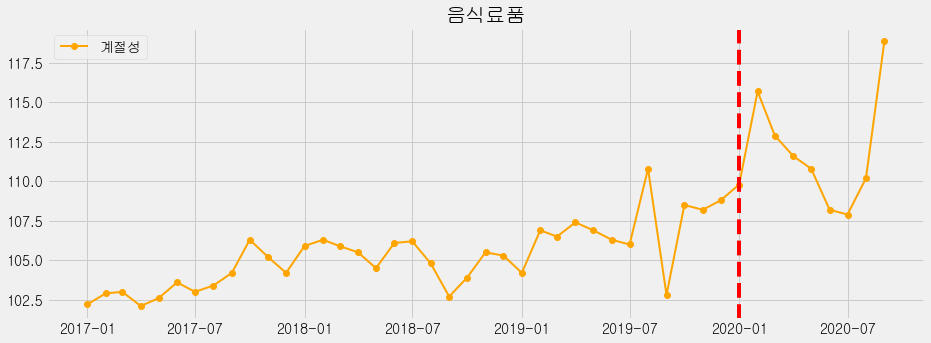

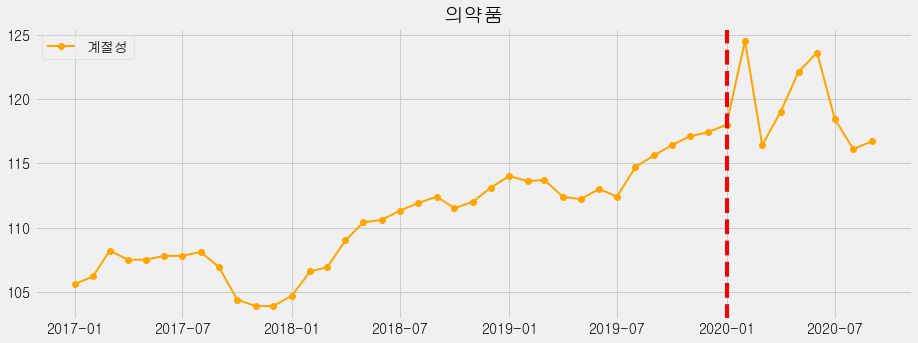

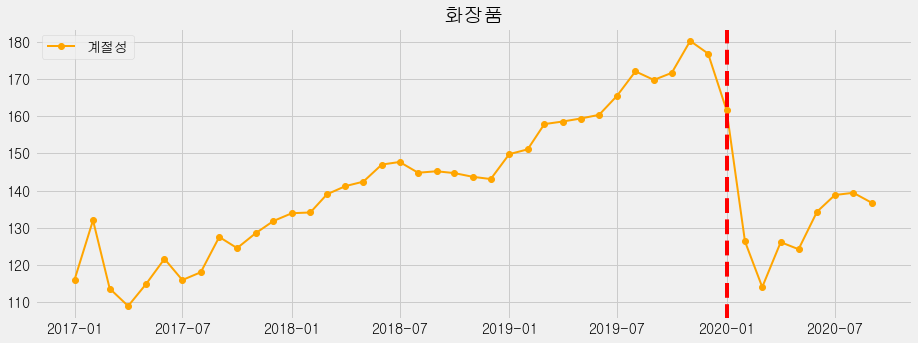

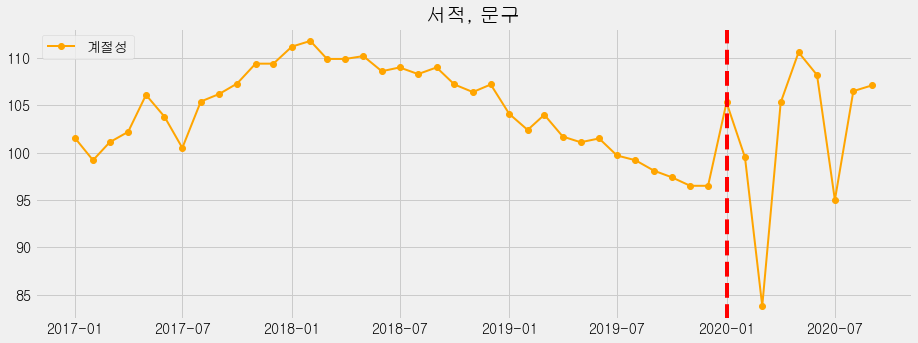

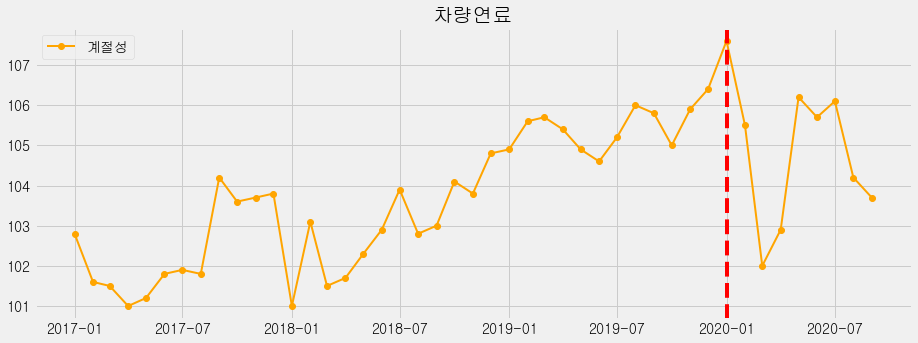

In [10]:
for i in types:
    fig, ax = plt.subplots(1,1,figsize=(14,5))
#     ax.plot(np.array(products[['시점']]),np.array(products[i]),marker='o', linewidth=2,label='경상',color='magenta')
    ax.plot(np.array(products_season[['시점']]),np.array(products_season[i]),marker='o', linewidth=2,label='계절성',color='orange')
    ax.axvline(x=products_season['시점'][36],linestyle ='--',color='red') 
    ax.legend(loc='upper left')
    ax.set_title(i)
    


In [11]:
products_season_temp=products_season.copy()

In [12]:
products_season.drop(columns=['시점']
                ,inplace=True)

In [13]:
products_af=products_season.iloc[36:]
products_bf=products_season.iloc[:36]

In [14]:
products_bf.reset_index(drop=True, inplace=True)

products_af.reset_index(drop=True, inplace=True)

In [15]:
types=products_af.columns

In [16]:
types

Index(['승용차', '가전제품', '통신기기 및 컴퓨터', '가구', '의복', '신발 및 가방', '오락, 취미, 경기용품',
       '음식료품', '의약품', '화장품', '서적, 문구', '차량연료'],
      dtype='object')

In [17]:
products_bf_T=products_bf.transform(lambda x: (x-x.mean())/x.std()).T
products_af_T=products_af.transform(lambda x: (x-x.mean())/x.std()).T

#.transform(lambda x: (x-x.min())/(x.max() - x.min()))

In [18]:
np.random.seed(0)
n_cluster = 4# 하이퍼 파라메터 튜닝 결과 4개의 클러스터가 효율적입니다. 
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=50,random_state=14).fit(products_bf_T) # 시계열 데이터를 euclidean 기반으로 시계열 클러스터링을 진행합니다.
rlt_tsm = km.predict(products_bf_T)

In [19]:
my_dict_bf = dict((i, []) for i in range(0, n_cluster))

for i in range(len(rlt_tsm)):
    my_dict_bf[rlt_tsm[i]].append(list(types)[i])

In [20]:
my_dict_bf

{0: ['승용차', '신발 및 가방', '오락, 취미, 경기용품', '음식료품', '의약품', '화장품', '차량연료'],
 1: ['통신기기 및 컴퓨터', '서적, 문구'],
 2: ['가전제품', '의복'],
 3: ['가구']}

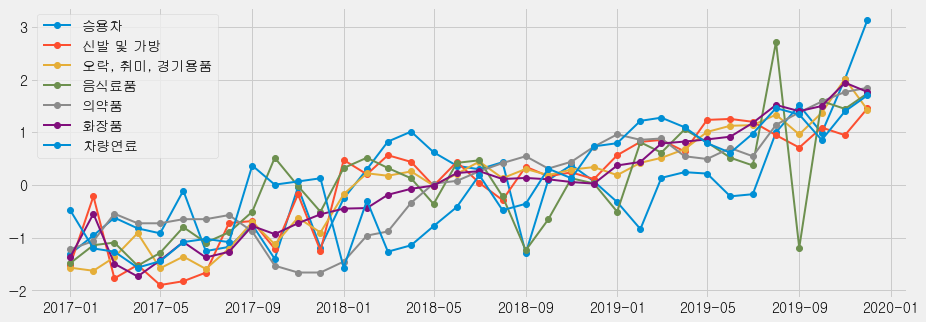

In [21]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[0]:
    ax.plot(products_season_temp[['시점']].iloc[:36],np.array(products_bf[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

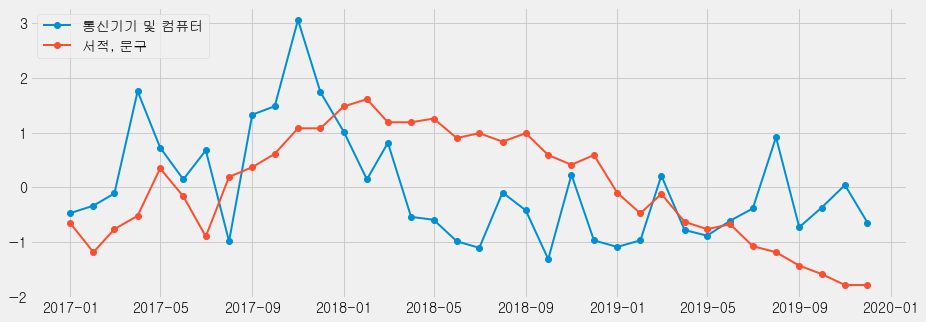

In [22]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[1]:
    ax.plot(products_season_temp[['시점']].iloc[:36],np.array(products_bf[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

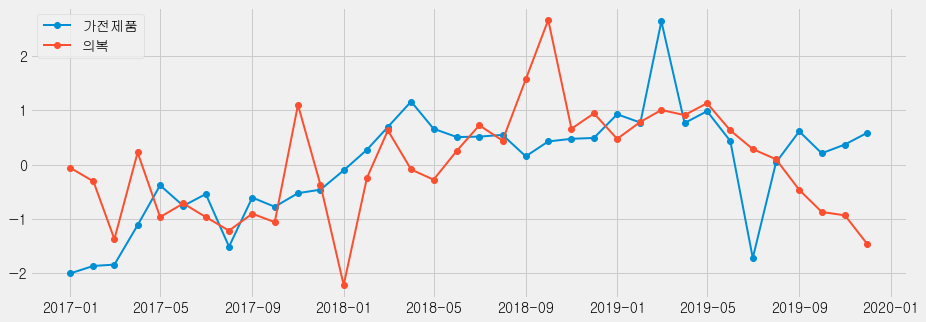

In [23]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[2]:
    ax.plot(products_season_temp[['시점']].iloc[:36],np.array(products_bf[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

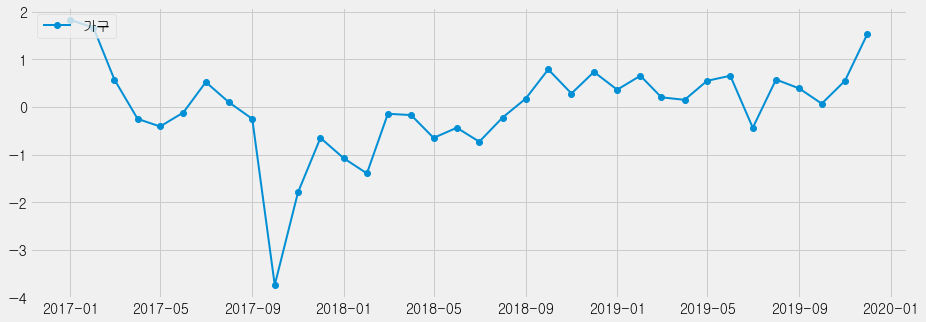

In [24]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf[3]:
    ax.plot(products_season_temp[['시점']].iloc[:36],np.array(products_bf[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

In [25]:
np.random.seed(0)
n_cluster = 4# 하이퍼 파라메터 튜닝 결과 4개의 클러스터가 효율적입니다. 
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=100,random_state=14).fit(products_af_T) # 시계열 데이터를 euclidean 기반으로 시계열 클러스터링을 진행합니다.
rlt_tsm = km.predict(products_af_T)

In [26]:
my_dict_af = dict((i, []) for i in range(0, n_cluster))

for i in range(len(rlt_tsm)):
    my_dict_af[rlt_tsm[i]].append(list(types)[i])

In [27]:
my_dict_af

{0: ['의복', '신발 및 가방', '의약품', '화장품', '차량연료'],
 1: ['승용차', '가구', '오락, 취미, 경기용품', '서적, 문구'],
 2: ['가전제품', '통신기기 및 컴퓨터'],
 3: ['음식료품']}

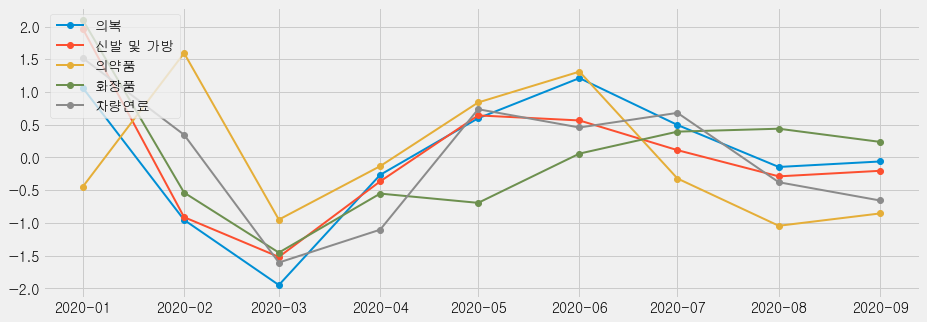

In [28]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[0]:
    ax.plot(products_season_temp[['시점']].iloc[36:],np.array(products_af[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

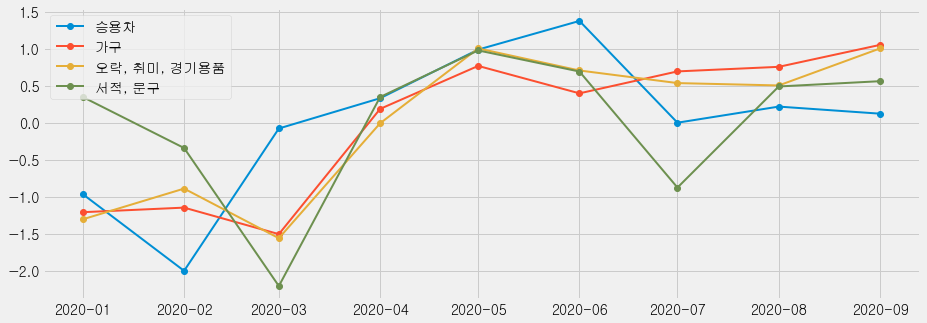

In [29]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[1]:
    ax.plot(products_season_temp[['시점']].iloc[36:],np.array(products_af[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

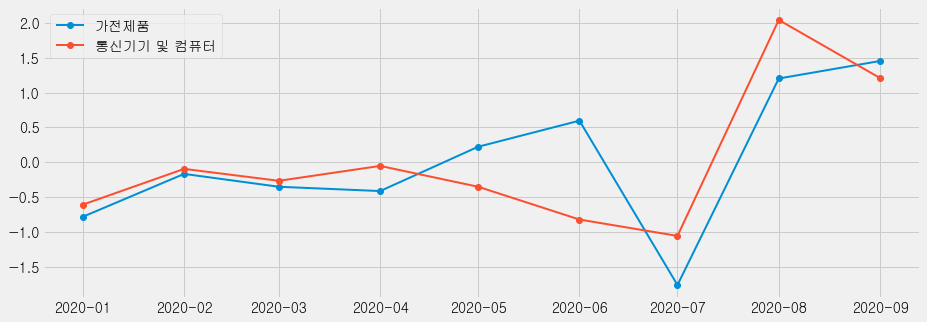

In [30]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[2]:
    ax.plot(products_season_temp[['시점']].iloc[36:],np.array(products_af[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

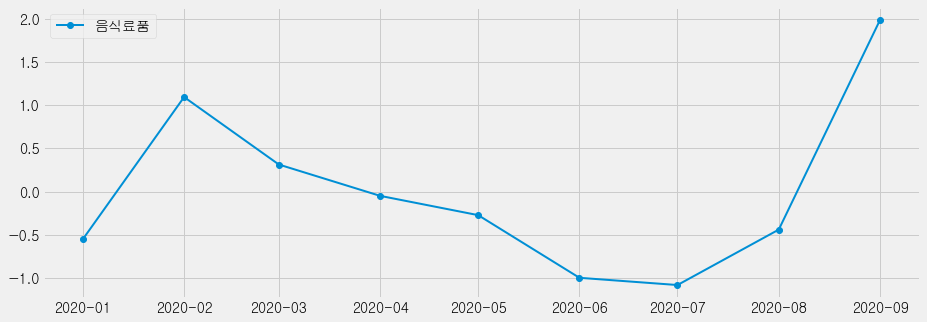

In [31]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_af[3]:
    ax.plot(products_season_temp[['시점']].iloc[36:],np.array(products_af[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

In [32]:
my_dict_bf

{0: ['승용차', '신발 및 가방', '오락, 취미, 경기용품', '음식료품', '의약품', '화장품', '차량연료'],
 1: ['통신기기 및 컴퓨터', '서적, 문구'],
 2: ['가전제품', '의복'],
 3: ['가구']}

In [33]:
my_dict_af

{0: ['의복', '신발 및 가방', '의약품', '화장품', '차량연료'],
 1: ['승용차', '가구', '오락, 취미, 경기용품', '서적, 문구'],
 2: ['가전제품', '통신기기 및 컴퓨터'],
 3: ['음식료품']}

In [34]:
products_bf2=products_season.iloc[12:37]
products_bf2.reset_index(drop=True, inplace=True)
products_bf2_T=products_bf2.transform(lambda x: (x-x.mean())/x.std()).T

np.random.seed(0)
n_cluster = 4# 하이퍼 파라메터 튜닝 결과 4개의 클러스터가 효율적입니다. 
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=100,random_state=14).fit(products_bf2_T) # 시계열 데이터를 euclidean 기반으로 시계열 클러스터링을 진행합니다.
rlt_tsm = km.predict(products_bf2_T)

my_dict_bf2 = dict((i, []) for i in range(0, n_cluster))

for i in range(len(rlt_tsm)):
    my_dict_bf2[rlt_tsm[i]].append(list(types)[i])

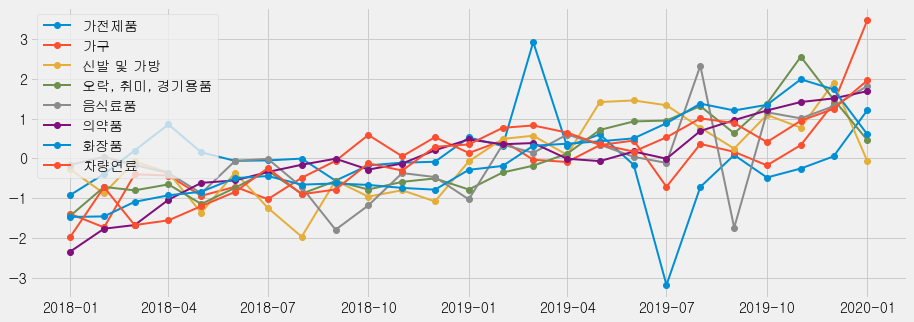

In [35]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf2[0]:
    ax.plot(products_season_temp[['시점']].iloc[12:37],np.array(products_bf2[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

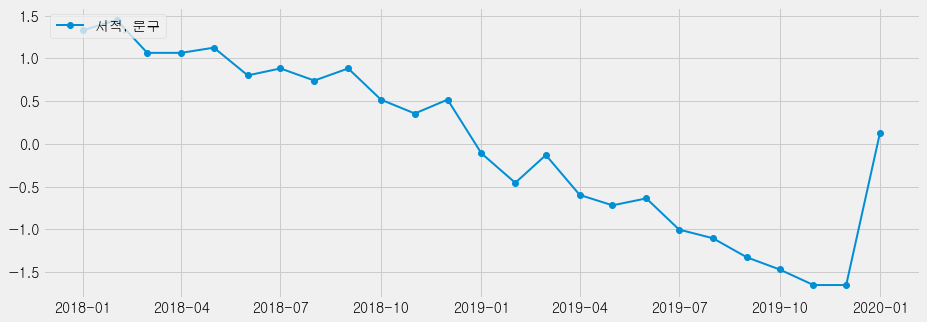

In [36]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf2[1]:
    ax.plot(products_season_temp[['시점']].iloc[12:37],np.array(products_bf2[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

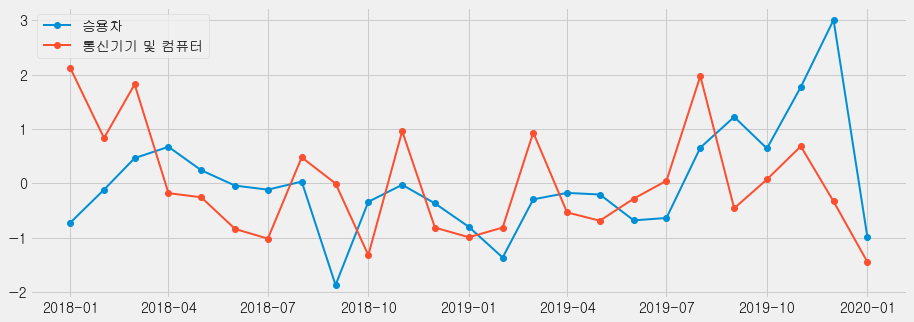

In [37]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf2[2]:
    ax.plot(products_season_temp[['시점']].iloc[12:37],np.array(products_bf2[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

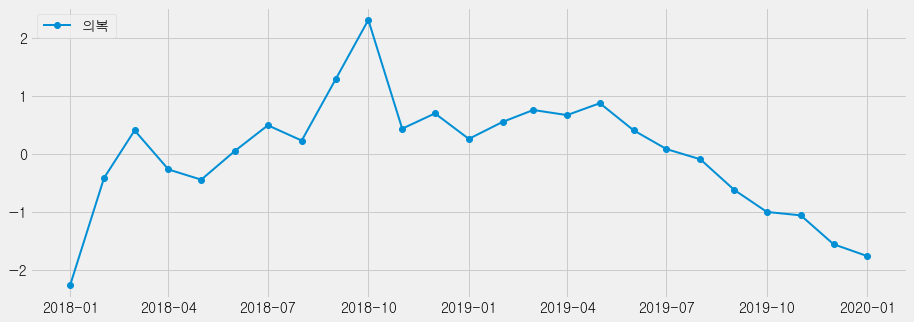

In [38]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

for i in my_dict_bf2[3]:
    ax.plot(products_season_temp[['시점']].iloc[12:37],np.array(products_bf2[i].transform(lambda x: (x-x.mean())/x.std())),marker='o', linewidth=2,label=i)
    ax.legend(loc='upper left')

In [39]:
my_dict_bf2

{0: ['가전제품', '가구', '신발 및 가방', '오락, 취미, 경기용품', '음식료품', '의약품', '화장품', '차량연료'],
 1: ['서적, 문구'],
 2: ['승용차', '통신기기 및 컴퓨터'],
 3: ['의복']}

In [40]:
my_dict_bf

{0: ['승용차', '신발 및 가방', '오락, 취미, 경기용품', '음식료품', '의약품', '화장품', '차량연료'],
 1: ['통신기기 및 컴퓨터', '서적, 문구'],
 2: ['가전제품', '의복'],
 3: ['가구']}

In [41]:
my_dict_af

{0: ['의복', '신발 및 가방', '의약품', '화장품', '차량연료'],
 1: ['승용차', '가구', '오락, 취미, 경기용품', '서적, 문구'],
 2: ['가전제품', '통신기기 및 컴퓨터'],
 3: ['음식료품']}

In [42]:
my_dict_bf2

{0: ['가전제품', '가구', '신발 및 가방', '오락, 취미, 경기용품', '음식료품', '의약품', '화장품', '차량연료'],
 1: ['서적, 문구'],
 2: ['승용차', '통신기기 및 컴퓨터'],
 3: ['의복']}